<a href="https://colab.research.google.com/github/ashraful005/DS_ML_Bootcamp/blob/master/mobilenet_bicubic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!pip install torchmetrics
!pip install torchinfo

In [3]:
# Data handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Preprocessing
import cv2
from sklearn.model_selection import train_test_split as tts

# Torch
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from torchmetrics.classification import MulticlassAccuracy

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# os
import os

# Path
from pathlib import Path

# tqdm
from tqdm.auto import tqdm

# typing
from typing import Dict, List

# Counter
from collections import Counter

# random
import random

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashraful005","key":"4f746c27dab22414e17a0f5a0fe3baca"}'}

In [5]:
!pip install kaggle

In [6]:
!mkdir ~/.kaggle

In [7]:
!cp kaggle.json ~/.kaggle

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
pip install --upgrade kaggle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.6-py3-none-any.whl size=111941 sha256=9ab9c276a0fb32249eec4954d3c5c462ec2887fd104ae0ab978d243d38a7e940
  Stored in directory: /root/.cache/pip/wheels/53/34/8c/8ca3450d17206d9e37e1ee3aeb47cbb2873d22a9e0c60eb137
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [10]:
!kaggle datasets list

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                            Vehicle Sales Data                                  19MB  2024-02-21 20:16:17          14175        256  1.0              
sudarshan24byte/online-food-dataset                           Online Food Dataset                                  3KB  2024-03-02 18:50:30           3933         64  0.9411765        
saurabhbadole/housing-price-data                              Housing Price Data                                   5KB  2024-03-13 05:07:54           1334         28  0.88235295       
arnavvvvv/spotify-music                                       Top Spotify S

In [11]:
!kaggle datasets download 'subirbiswas19/freshwater-fish-disease-aquaculture-in-south-asia'

 47% 5.00M/10.6M [00:00<00:00, 47.2MB/s]
100% 10.6M/10.6M [00:00<00:00, 85.5MB/s]


In [12]:
!unzip freshwater-fish-disease-aquaculture-in-south-asia.zip

Archive:  freshwater-fish-disease-aquaculture-in-south-asia.zip
  inflating: SB-Fish-Disease.csv     
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).jpeg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).png  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (10).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (11).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (12).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (13).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (15).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (16).jpg  
  inflating: SB-Fi

In [13]:
import pandas as pd
import numpy as np
import os
import glob

import PIL
from PIL import Image
import imageio

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import seaborn as sn
import numpy as np
import pathlib
import pandas as pd
import numpy as np
import os
import glob

import PIL
from PIL import Image
import imageio

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import seaborn as sn
import numpy as np
import pathlib

#Deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

**Load** **Dataset**

In [96]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#dataset_path = '/content/SB-FishDisease'

IMAGE_SIZE = 64
BATCH_SIZE = 32
EPOCHS=50

dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/SB-FishDisease/SB-FishDisease",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,

)





Found 457 files belonging to 7 classes.


In [97]:
resize_and_rescale= tf.keras.Sequential(
    [
        layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.experimental.preprocessing.Rescaling(1.0/255)
    ]
)

In [98]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [99]:
print(len(dataset))

15


In [100]:
classes=dataset.class_names
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

(32, 64, 64, 3)
[2 4 4 6 4 5 4 4 4 1 2 6 4 1 2 2 2 1 4 4 1 4 4 4 4 1 4 2 4 4 5 5]
(64, 64, 3)


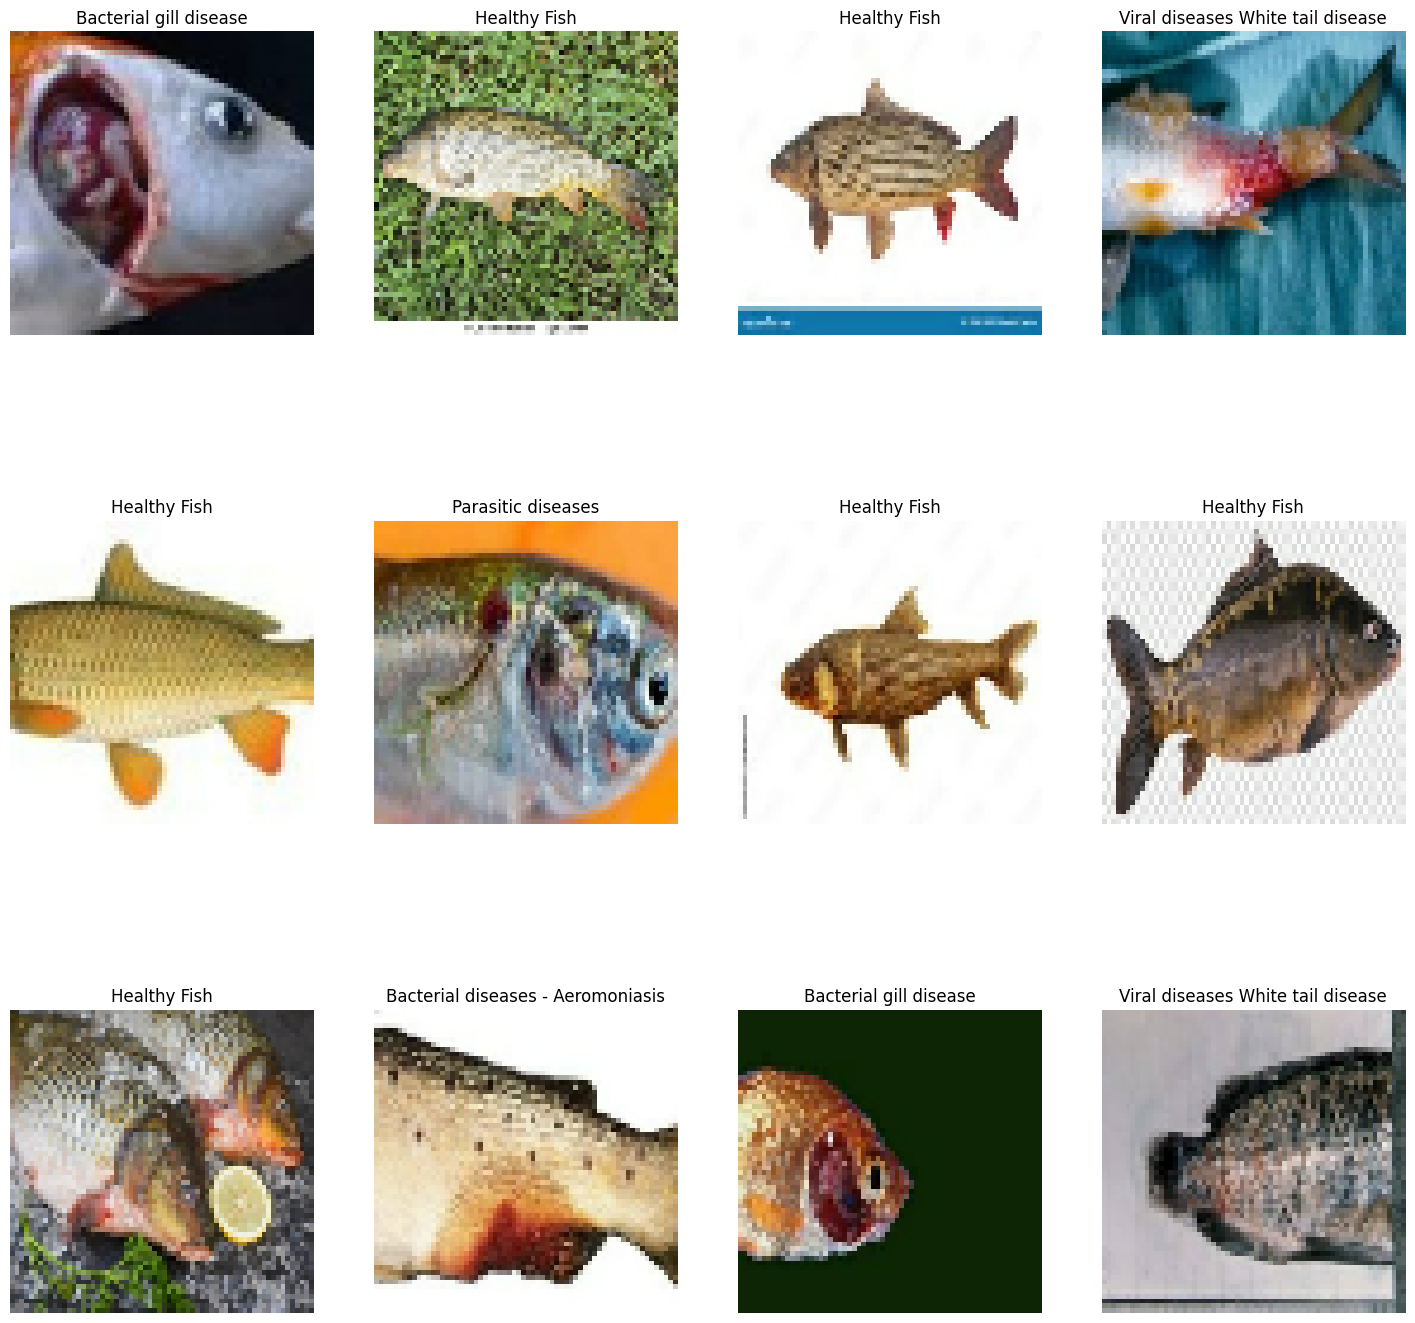

In [101]:

plt.figure(figsize=(18,18))
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())
  print(image_batch[0].shape)
  for i in range(12):
      ax = plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(classes[label_batch[i]])
      plt.axis("off")

In [102]:
import tensorflow as tf
CHANNELS = 3
IMG_SIZE = 128
input_shape = (IMG_SIZE, IMG_SIZE,CHANNELS)
def resize_with_bilinear_interpolation(image):
    image = tf.image.resize(image, (input_shape[0], input_shape[1]), method=tf.image.ResizeMethod.BICUBIC)
    return image

dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/SB-FishDisease/SB-FishDisease",
    shuffle=True,
    image_size=input_shape[:2],
    batch_size=BATCH_SIZE
)
dataset = dataset.map(lambda x, y: (resize_with_bilinear_interpolation(x), y))

Found 457 files belonging to 7 classes.


(32, 128, 128, 3)
[5 5 2 4 5 4 0 2 5 4 0 6 4 5 4 4 4 5 0 1 2 5 6 0 0 4 4 2 4 4 4 0]
(128, 128, 3)


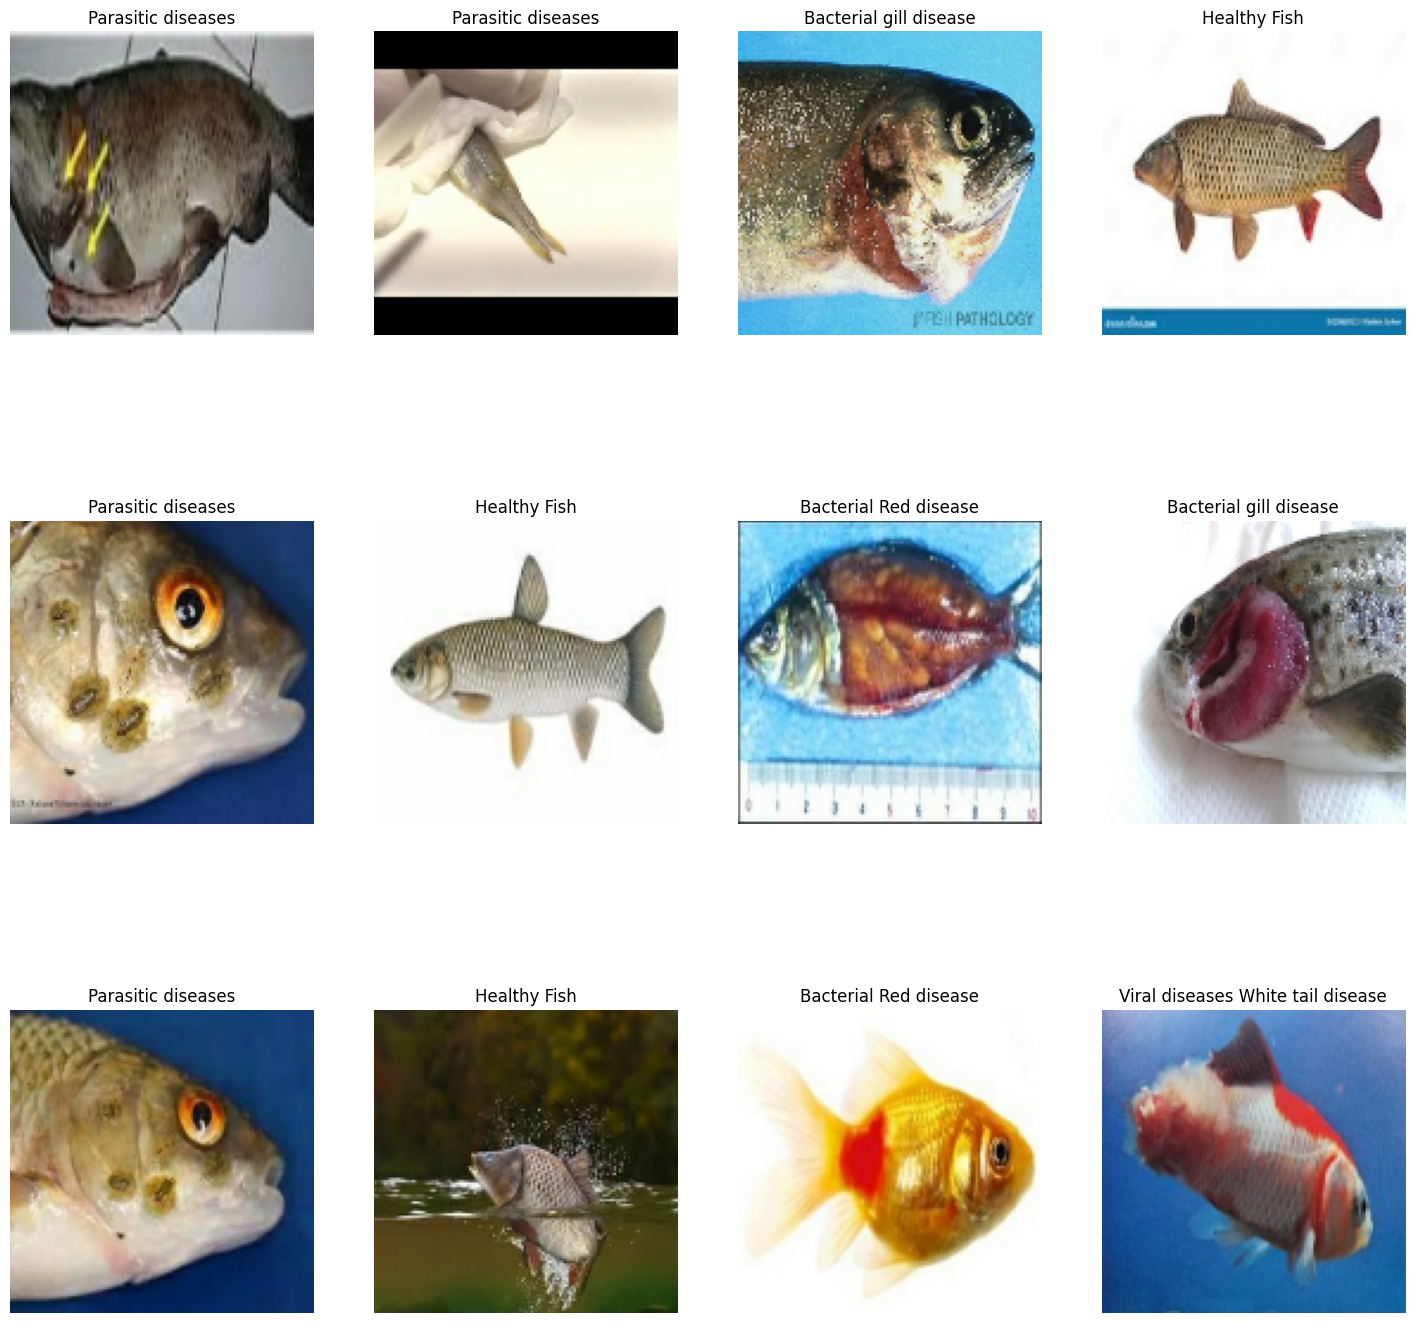

In [103]:
plt.figure(figsize=(18,18))
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())
  print(image_batch[0].shape)
  for i in range(12):
      ax = plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(classes[label_batch[i]])
      plt.axis("off")

In [104]:
import tensorflow as tf

IMAGE_SIZE = 128
BATCH_SIZE = 32
AUGMENTATION_FACTOR = 3

dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/SB-FishDisease/SB-FishDisease",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

augmented_dataset = dataset.flat_map(lambda x, y: tf.data.Dataset.from_tensors((data_augmentation(x), y)).repeat(AUGMENTATION_FACTOR))
augmented_dataset = augmented_dataset.shuffle(buffer_size=len(dataset) * AUGMENTATION_FACTOR)
augmented_dataset = augmented_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
print("Length of the augmented dataset:", len(list(augmented_dataset)))


Found 457 files belonging to 7 classes.
Length of the augmented dataset: 45


(32, 128, 128, 3)
[0 0 2 1 5 5 4 4 6 4 5 4 0 1 1 2 2 5 4 1 1 4 5 4 4 4 2 4 1 4 3 2]
(128, 128, 3)


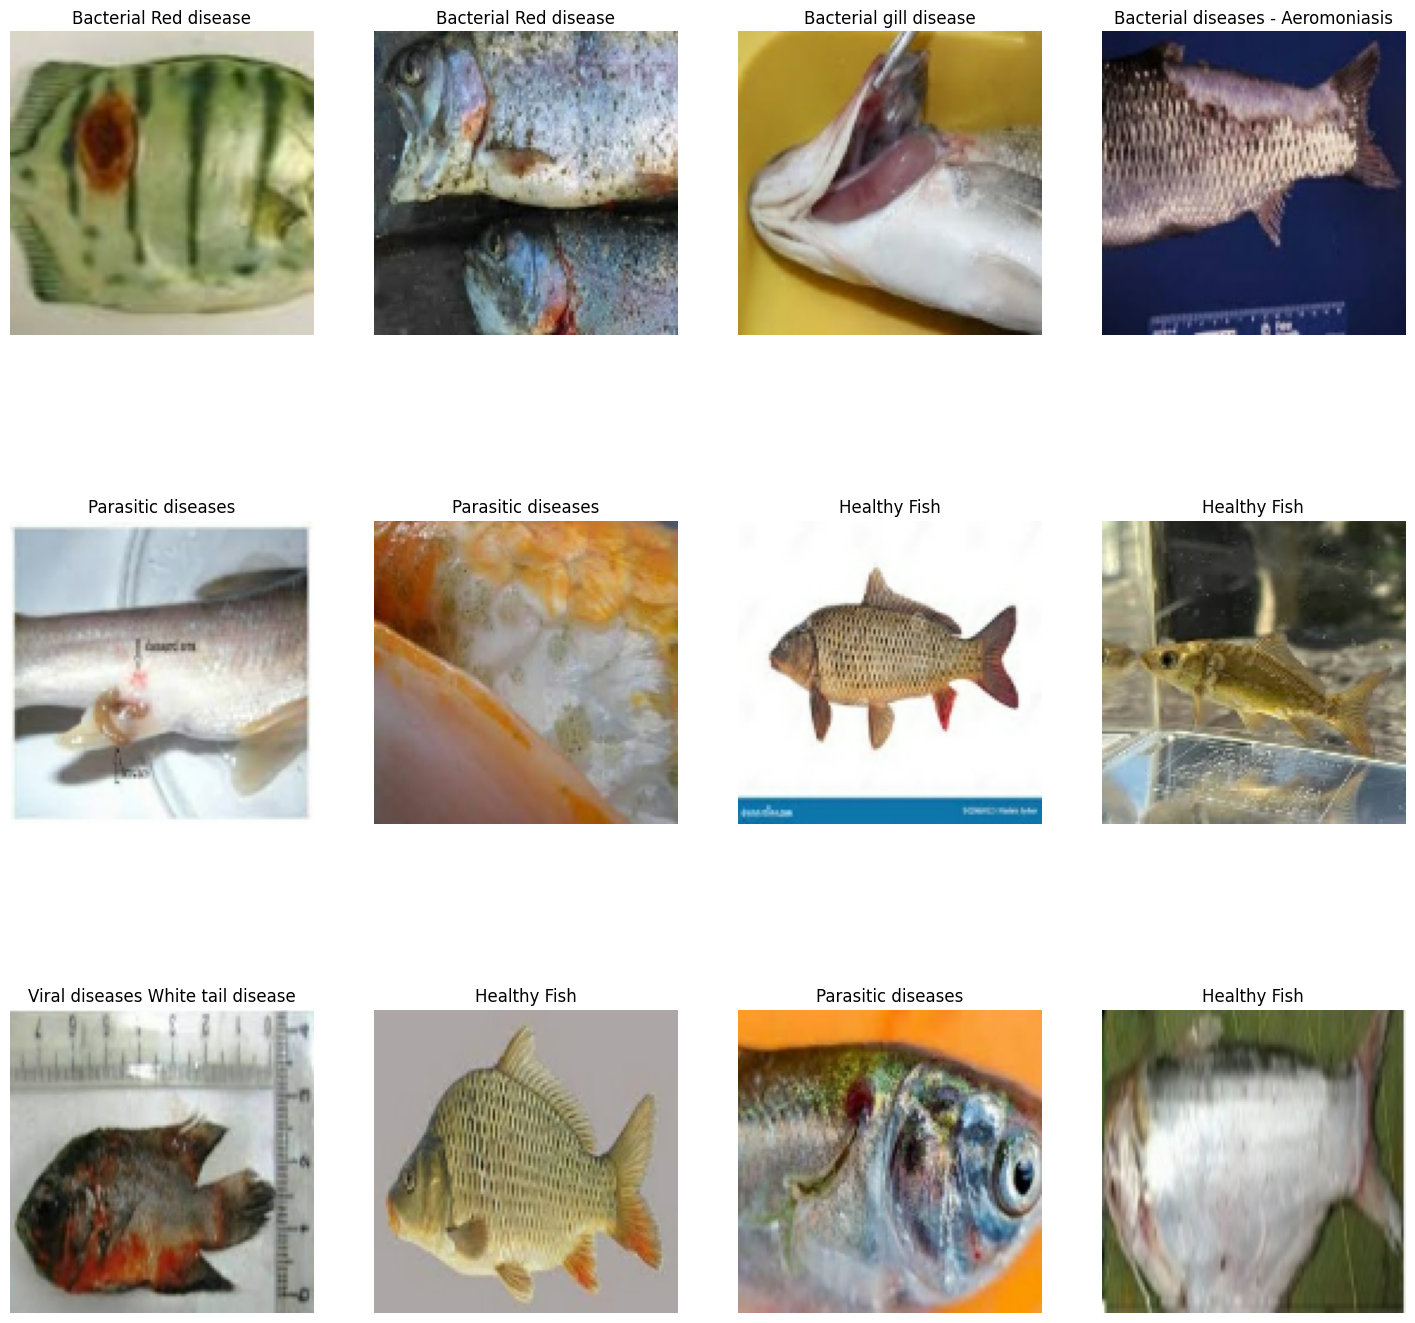

In [109]:
plt.figure(figsize=(18,18))
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())
  print(image_batch[0].shape)
  for i in range(12):
      ax = plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(classes[label_batch[i]])
      plt.axis("off")

In [110]:
import tensorflow as tf
BATCH_SIZE = 32
num_images = 0
for batch in augmented_dataset:
    num_images += batch[0].shape[0]

print("Number of images in the augmented dataset:", num_images)


Number of images in the augmented dataset: 1371


In [111]:
lr_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/SB-FishDisease/SB-FishDisease",
    shuffle=True,
    image_size=(32,32),
    batch_size=BATCH_SIZE,
)

hr_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/SB-FishDisease/SB-FishDisease",
    shuffle=True,
    image_size=(224,224),
    batch_size=BATCH_SIZE,
)

Found 457 files belonging to 7 classes.
Found 457 files belonging to 7 classes.


In [112]:
lr_images = []
hr_images = []

for image_batch, _ in lr_dataset.take(len(lr_dataset)):
  print(image_batch.shape)
  for i in range(image_batch.shape[0]):
    lr_images.append(image_batch[i])


for image_batch, _ in hr_dataset.take(len(hr_dataset)):
  print(image_batch.shape)
  for i in range(image_batch.shape[0]):
    hr_images.append(image_batch[i])
len(lr_images)

(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 32, 32, 3)
(9, 32, 32, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(9, 224, 224, 3)


457

In [113]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers, Model
from sklearn.model_selection import train_test_split

import numpy as np
from keras import Model
from keras.layers import Conv2D, PReLU,BatchNormalization, Flatten
from keras.layers import UpSampling2D, LeakyReLU, Dense, Input, add
from tqdm import tqdm

In [114]:
lr_images = np.array(lr_images)
hr_images = np.array(hr_images)

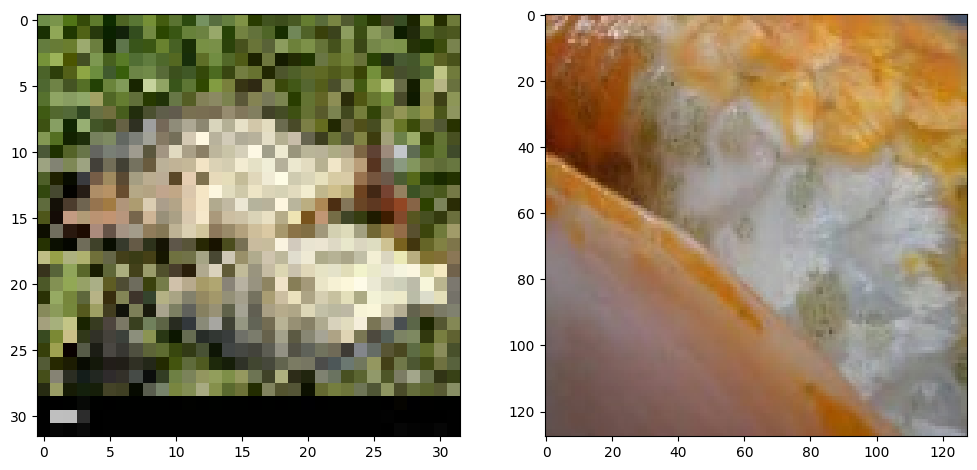

In [115]:
import random
import numpy as np
image_number = random.randint(0, len(lr_images)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
lr_images[image_number].shape
plt.imshow(np.reshape(lr_images[image_number].astype("uint8"), (32, 32, 3)))
plt.subplot(122)

resized_hr_image = cv2.resize(hr_images[image_number], (128, 128))

plt.imshow(np.reshape(resized_hr_image.astype("uint8"), (128, 128, 3)))
plt.show()

In [116]:
lr_images = np.array(lr_images)
hr_images = np.array(hr_images)
lr_images = lr_images / 255.
hr_images = hr_images / 255.

#Split to train and test
lr_train, lr_test, hr_train, hr_test = train_test_split(lr_images, hr_images,
                                                      test_size=0.33, random_state=42)

In [117]:
hr_shape = (hr_train.shape[1], hr_train.shape[2], hr_train.shape[3])
lr_shape = (lr_train.shape[1], lr_train.shape[2], lr_train.shape[3])

In [118]:
lr_ip = Input(shape=lr_shape)
hr_ip = Input(shape=hr_shape)
#new_input_shape = (128, 128, 3)
#lr_ip = Input(shape=new_input_shape)

In [119]:
train_size=0.7
val_size=0.1
len(list(augmented_dataset))*train_size

31.499999999999996

In [120]:
train_ds=augmented_dataset.take(int(len(list(augmented_dataset))*train_size))
len(list(train_ds))

31

In [121]:
secondary_ds = augmented_dataset.skip(int(len(list(augmented_dataset))*train_size))
len(list(secondary_ds))

14

In [122]:
import math
val_ds=secondary_ds.take(math.ceil(len(list(secondary_ds))*val_size))
len(list(val_ds))

2

In [123]:
test_ds=secondary_ds.skip(math.ceil(len(list(secondary_ds))*val_size))
len(list(test_ds))

12

In [124]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

IMAGE_SIZE = 128  # Assuming you have a specific image size
CHANNELS = 3
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
num_classes = 7

base_model = MobileNet(include_top=False, weights='imagenet', input_shape=input_shape, pooling='max')
model = models.Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(1024, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.4, seed=75),
    Dense(1024, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.2, seed=75),
    Dense(num_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [125]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functi  (None, 1024)              3228864   
 onal)                                                           
                                                                 
 batch_normalization_2 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_5 (Dropout)         (None, 1024)             

In [126]:
!pip install --upgrade visualkeras

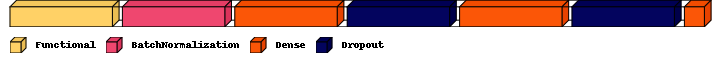

In [127]:
from tensorflow.keras import layers
from collections import defaultdict
import visualkeras

# Customize the colors
color_map = defaultdict(dict)
color_map[layers.Conv2D]["fill"] = "#00f5d4"
color_map[layers.MaxPooling2D]["fill"] = "#8338ec"
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'

def get_layer_shapes(layer):
    input_shape = layer.input_shape
    output_shape = layer.output_shape
    return [input_shape[1], input_shape[2], input_shape[3]], [output_shape[1], output_shape[2], output_shape[3]]

visualkeras.layered_view(model, legend=True, scale_xy=2.0, color_map=color_map, to_file='model.png')

In [128]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [129]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
31/31 [==============================] - 33s 216ms/step - loss: 29.8404 - accuracy: 0.6712 - val_loss: 24.0424 - val_accuracy: 0.4062
Epoch 2/50
31/31 [==============================] - 3s 77ms/step - loss: 14.6945 - accuracy: 0.8407 - val_loss: 11.6570 - val_accuracy: 0.5854
Epoch 3/50
31/31 [==============================] - 4s 81ms/step - loss: 6.9430 - accuracy: 0.8884 - val_loss: 5.6038 - val_accuracy: 0.6875
Epoch 4/50
31/31 [==============================] - 3s 79ms/step - loss: 3.5764 - accuracy: 0.8795 - val_loss: 3.9266 - val_accuracy: 0.4375
Epoch 5/50
31/31 [==============================] - 3s 79ms/step - loss: 2.1587 - accuracy: 0.8858 - val_loss: 2.2322 - val_accuracy: 0.6875
Epoch 6/50
31/31 [==============================] - 4s 85ms/step - loss: 1.5209 - accuracy: 0.8805 - val_loss: 1.6060 - val_accuracy: 0.7500
Epoch 7/50
31/31 [==============================] - 3s 78ms/step - loss: 1.2095 - accuracy: 0.8885 - val_loss: 1.3054 - val_accuracy: 0.8125
Epoch 8

In [130]:
scores = model.evaluate(test_ds)

12/12 [==============================] - 1s 24ms/step - loss: 0.6027 - accuracy: 0.8984


In [131]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': None}

In [132]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [133]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [134]:
test_loss, test_acc = model.evaluate(test_ds)

12/12 [==============================] - 2s 20ms/step - loss: 0.5986 - accuracy: 0.9143


Text(0.5, 1.0, 'Training, Validation and Test Loss')

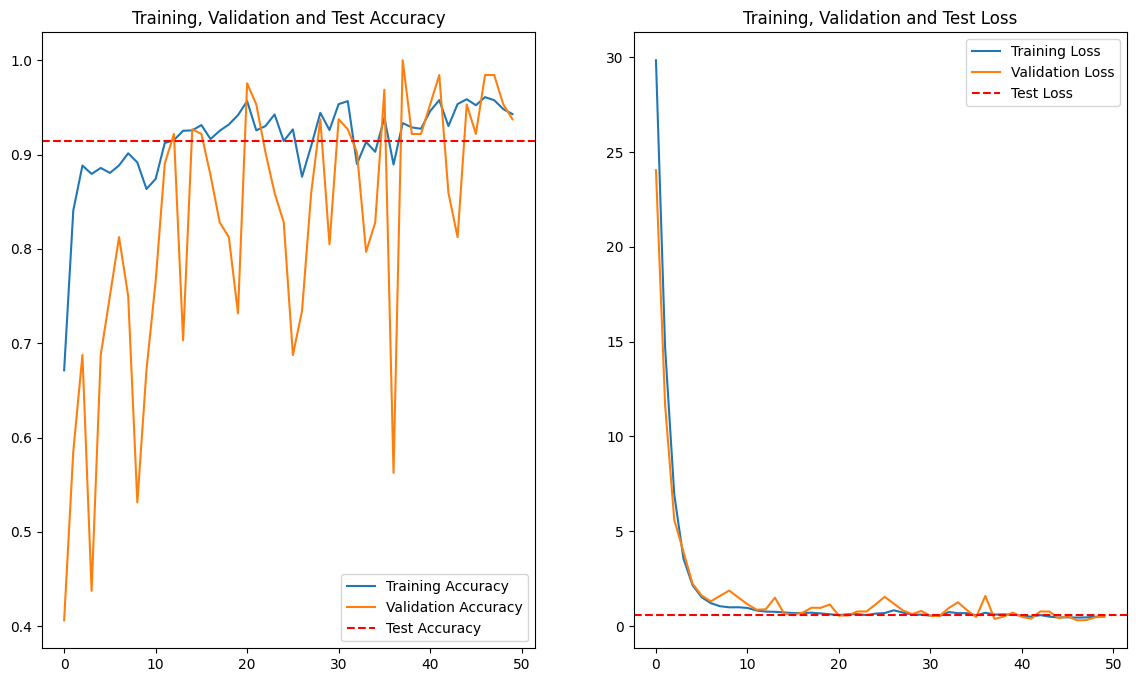

In [135]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training, Validation and Test Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training, Validation and Test Loss')

First image to predict
Actual label:  Healthy Fish
1/1 [==============================] - 1s 957ms/step
Predicted label: Healthy Fish


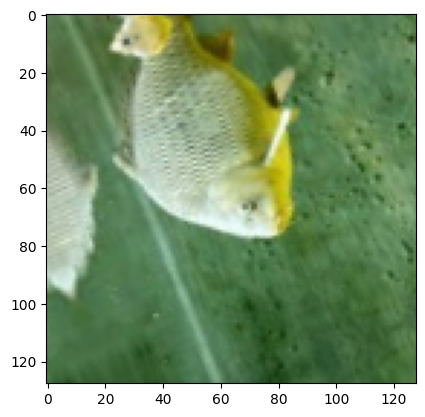

In [136]:
for image_batch, label_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()

  print("First image to predict")
  plt.imshow(first_image)
  print("Actual label: ", classes[first_label])

  batch_predict = model.predict(image_batch)
  print("Predicted label:", classes[np.argmax(batch_predict[0])])

In [137]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)

  predicted_class = classes[np.argmax(predictions[0])]
  probabilities = tf.nn.softmax(predictions)
  confidence = 100 * probabilities[0, np.argmax(predictions)]

  return predicted_class,confidence

1/1 [==============================] - 0s 33ms/step


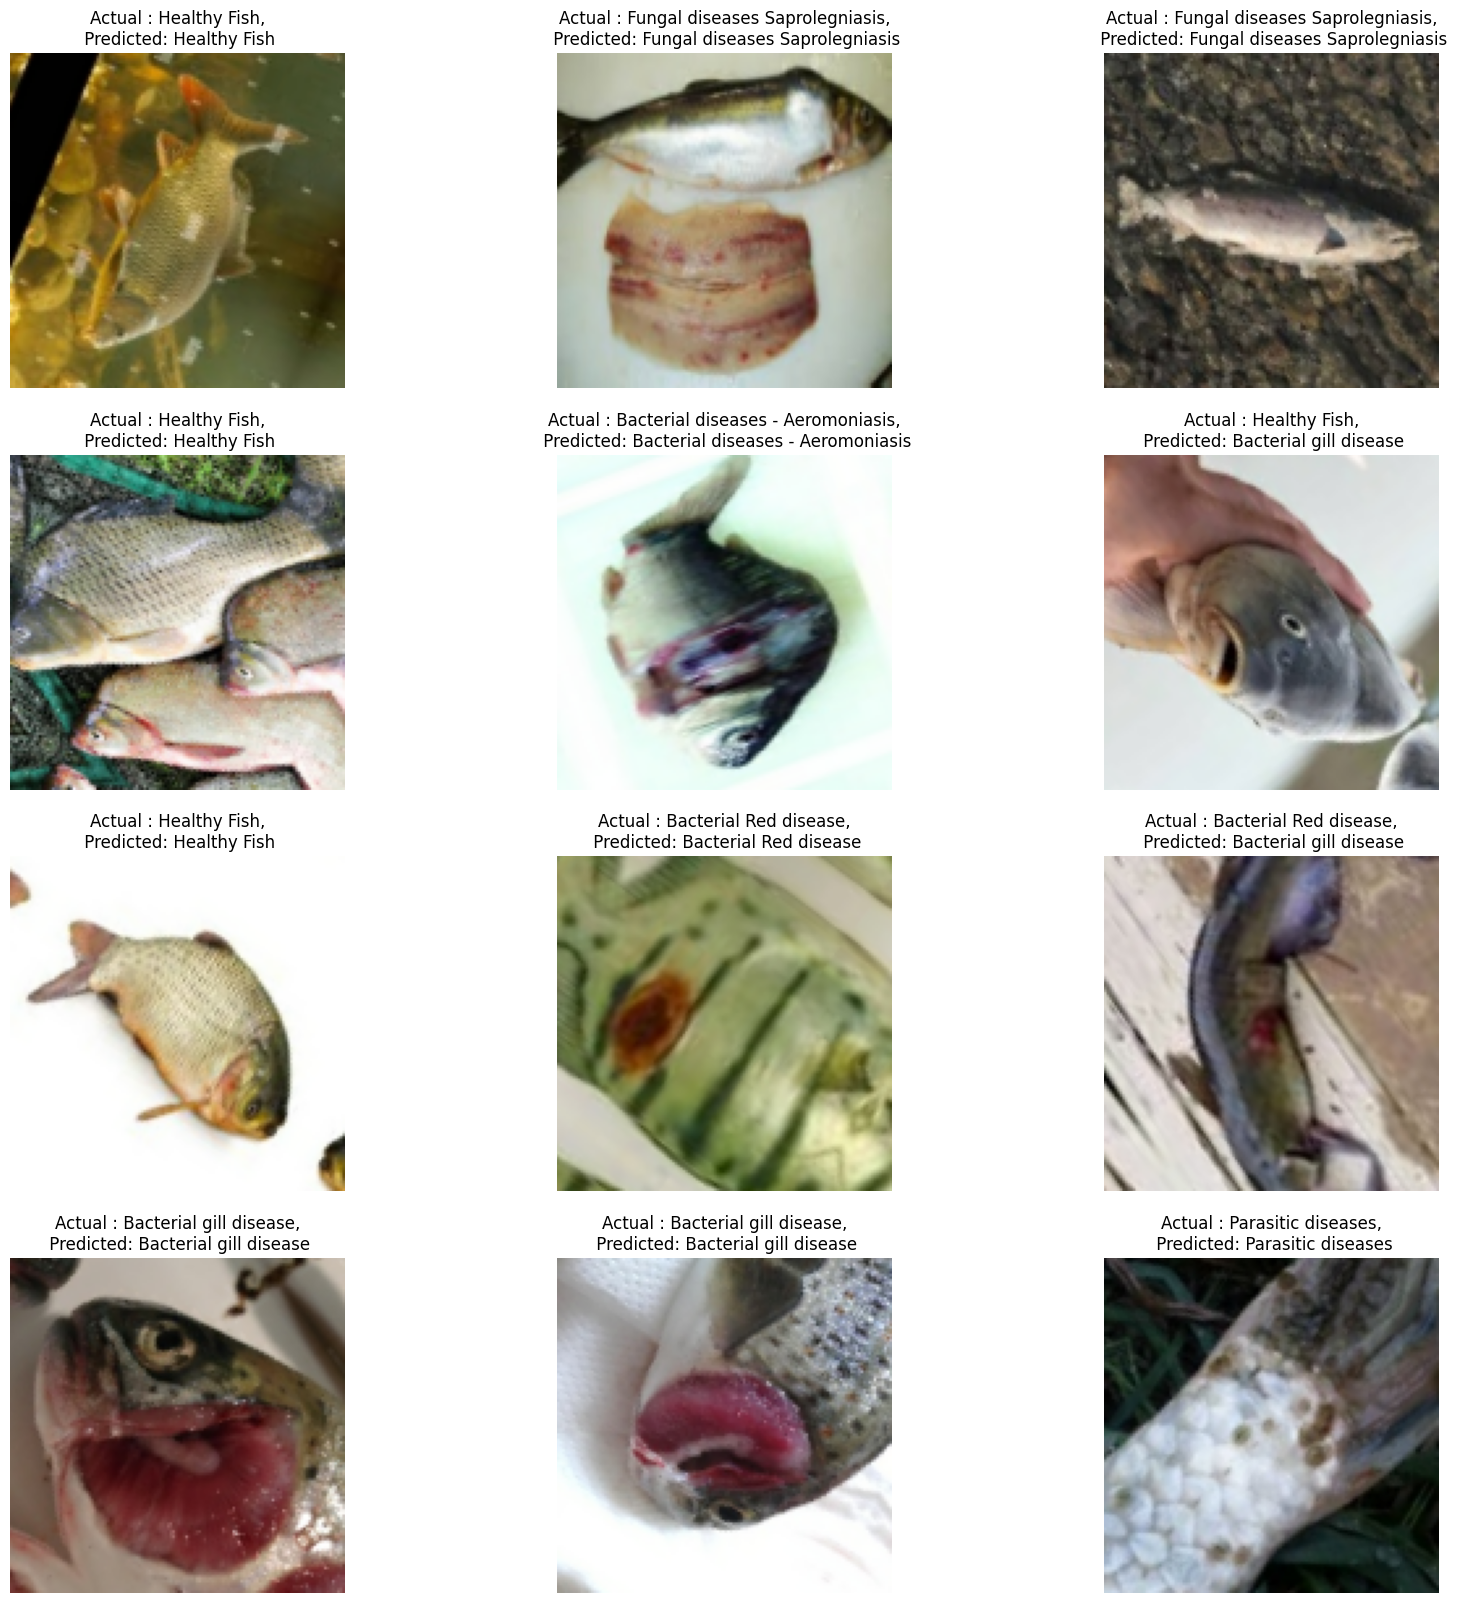

In [138]:
plt.figure(figsize=(20,20))

for images, labels in test_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4,3, i+1)
    predicted_class, _ = predict(model, images[i].numpy())
    actual_class = classes[labels[i]]

    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(f"Actual : {actual_class},\n Predicted: {predicted_class}")
    plt.axis("off")

In [139]:
model_version=1
model.save(f"../models/{model_version}")

In [140]:
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

In [141]:
def classification_report_gen(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)
  predictions = model.predict(img_array)
  predicted_class = classes[np.argmax(predictions)]
  return predicted_class, predictions

1/1 [==============================] - 0s 20ms/step
                                   precision    recall  f1-score   support

            Bacterial Red disease       1.00      0.85      0.92        40
Bacterial diseases - Aeromoniasis       0.98      0.98      0.98        46
           Bacterial gill disease       0.73      0.96      0.83        49
   Fungal diseases Saprolegniasis       0.93      1.00      0.96        37
                     Healthy Fish       1.00      0.92      0.96       143
               Parasitic diseases       1.00      0.84      0.92        32
Viral diseases White tail disease       0.86      0.97      0.91        37

                         accuracy                           0.93       384
                        macro avg       0.93      0.93      0.92       384
                     weighted avg       0.94      0.93      0.93       384



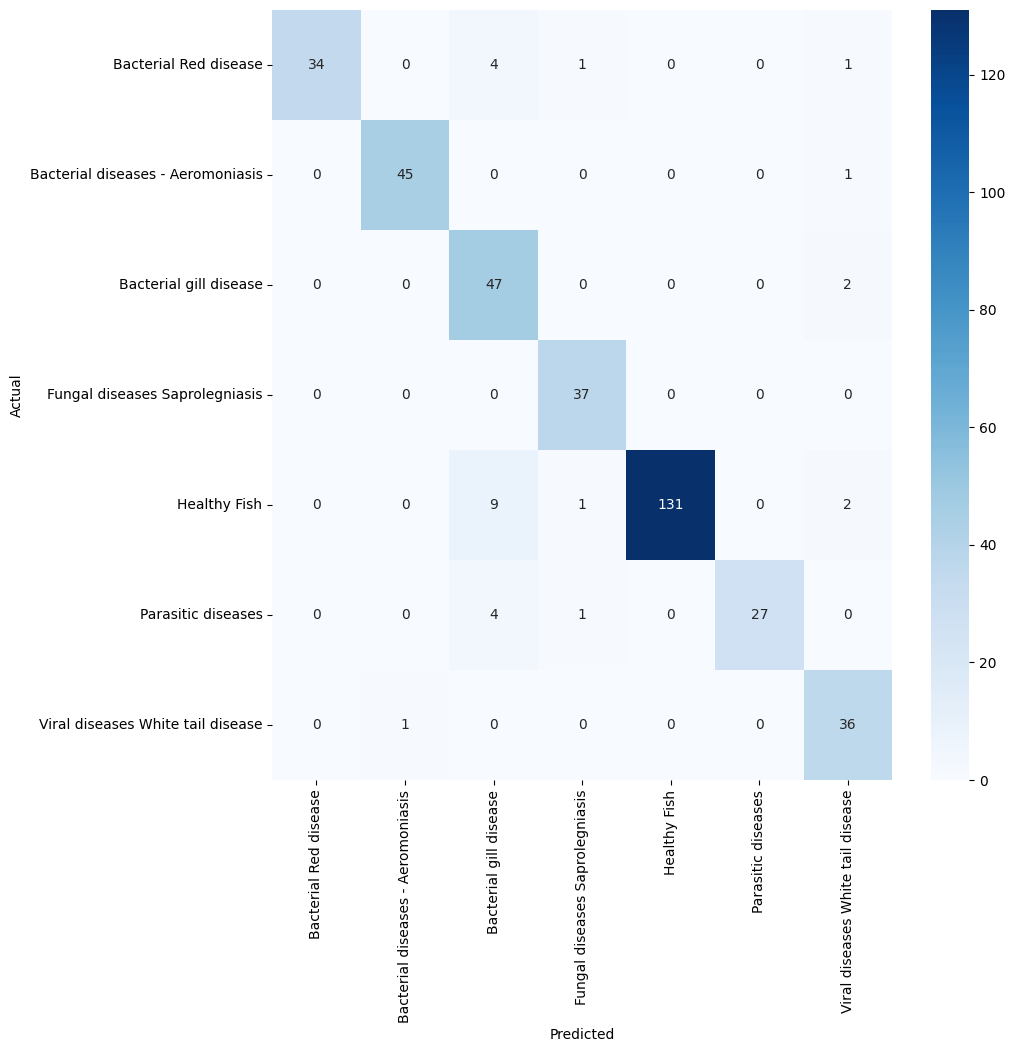

In [142]:
import matplotlib.pyplot as plt
import seaborn as sn

y_pred = []
y_true = []

for images, labels in test_ds:
  for image, label in zip(images, labels):
    image = image.numpy()
    predicted_class, _ = classification_report_gen(model, image)
    y_pred.append(predicted_class)
    y_true.append(classes[label])

print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 10))
sn.heatmap(cm,cmap='Blues', annot=True, fmt="d", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [143]:
accuracy = np.trace(cm) / float(np.sum(cm))
print("Accuracy:", accuracy)

Accuracy: 0.9296875
